In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

import os
os.chdir("/Users/deweywang/Desktop/GitHub/HEVisum/")


# Training data preparation 

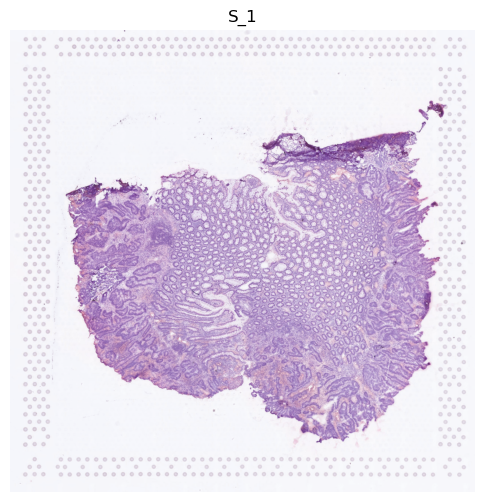

In [17]:
with h5py.File("./dataset/elucidata_ai_challenge_data.h5", "r") as h5file:
    train_images = h5file["images/Train"]
    train_spots = h5file["spots/Train"]
    
    sample = 'S_1'
    image = np.array(train_images[sample])
    spots = np.array(train_spots[sample])
    x, y = spots["x"], spots["y"]
    
    plt.figure(figsize=(6,6))
    plt.imshow(image, aspect="auto")
    #plt.scatter(x, y, color="red", s=1, alpha=0.4)
    plt.axis('off')
    plt.title(sample)
    plt.show()

/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/675743859.py:35: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/675743859.py:35: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/675743859.py:35: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/675743859.py:35: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/675743859.py:35: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj3

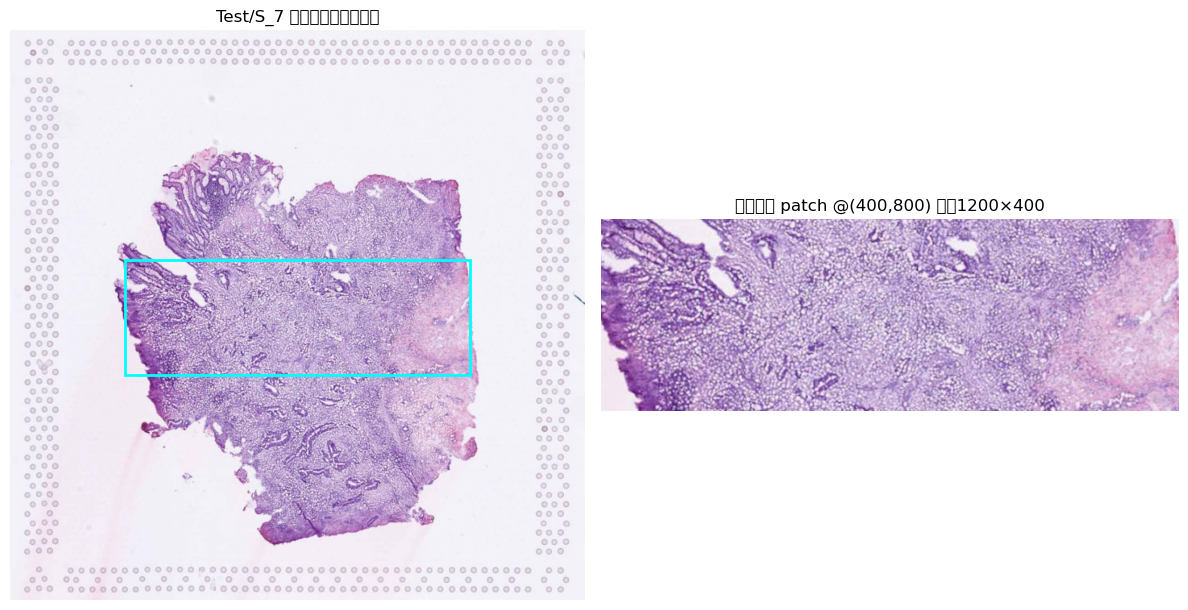

▶️ 参考 HED means : [0.02970393 0.00921725 0.0089115 ]
▶️ 参考 HED stds  : [0.01815006 0.00672658 0.00692187]


In [6]:
from skimage.color import rgb2hed, hed2rgb
# -----------------------------------------------------------------------------
# 0) 手动指定要截取的 Test 图像区域 (x0, y0) 为左上角，大小为 patch_w×patch_h
# -----------------------------------------------------------------------------
# 比如你观察过 S_7，想从 (x0=1000, y0=2000) 开始截 512×512
x0, y0      = 400, 800  
patch_w     = 1200
patch_h     = 400

# -----------------------------------------------------------------------------
# 1) 读取 Test/S_7 整图，并截出手标区域显示
# -----------------------------------------------------------------------------
with h5py.File("./dataset/elucidata_ai_challenge_data.h5", "r") as h5:
    ref_img = np.array(h5["images/Test"]["S_7"])  # [H,W,3] 0–1

# 转到 0–255 uint8
ref_uint8 = (ref_img * 255).astype(np.uint8)
H, W, _   = ref_uint8.shape

# 裁切
patch = ref_uint8[y0:y0+patch_h, x0:x0+patch_w]

# 可视化整图+裁切框
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.imshow(ref_uint8)
ax0.add_patch(plt.Rectangle((x0,y0), patch_w, patch_h,
                            edgecolor='cyan', facecolor='none', linewidth=2))
ax0.set_title("Test/S_7 原图与手动裁切区域")
ax0.axis("off")

ax1.imshow(patch)
ax1.set_title(f"裁切出的 patch @({x0},{y0}) 大小{patch_w}×{patch_h}")
ax1.axis("off")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 2) 用这块 patch 计算 HED 参考的 mean/std
# -----------------------------------------------------------------------------
# 转回浮点 [0,1]
patch_f = patch.astype(np.float32) / 255.0
hed_patch = rgb2hed(patch_f)
means_ref = hed_patch.reshape(-1,3).mean(axis=0)
stds_ref  = hed_patch.reshape(-1,3).std(axis=0)
print("▶️ 参考 HED means :", means_ref)
print("▶️ 参考 HED stds  :", stds_ref)


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/780993284.py:97: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(); plt.show()


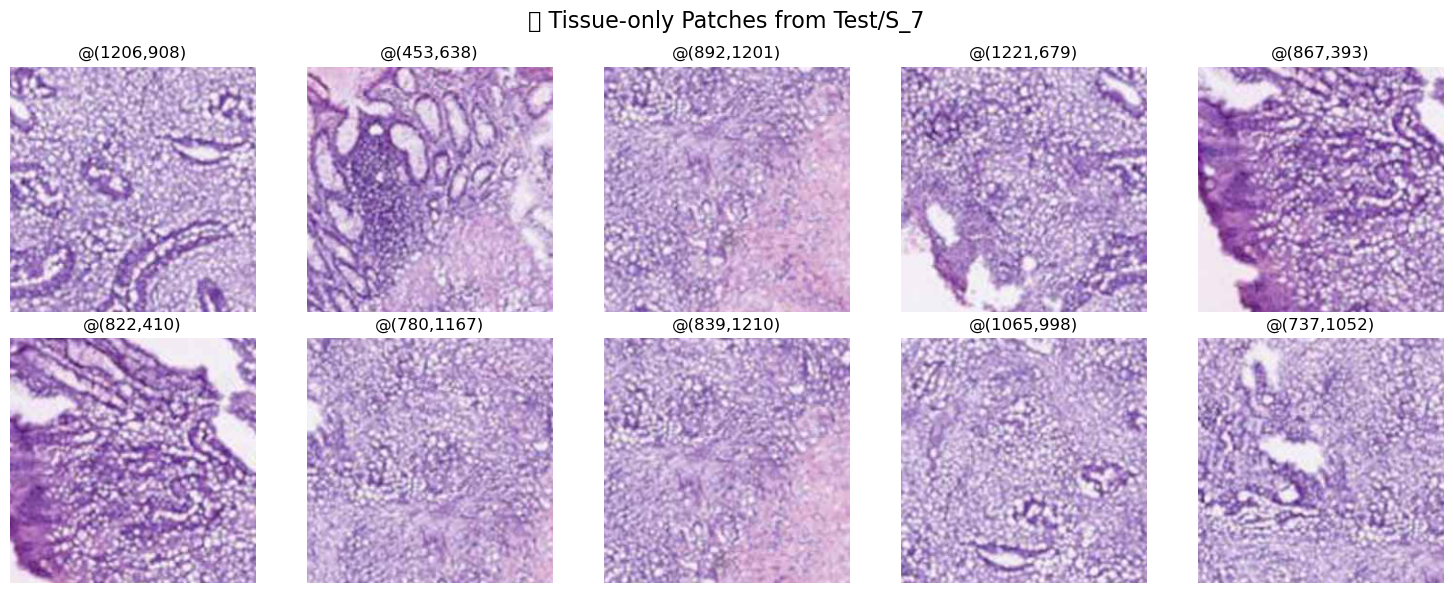

/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/780993284.py:142: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/780993284.py:142: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/780993284.py:142: UserWarning: Glyph 21482 (\N{CJK UNIFIED IDEOGRAPH-53EA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/780993284.py:142: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_87348/780993284.py:142: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0

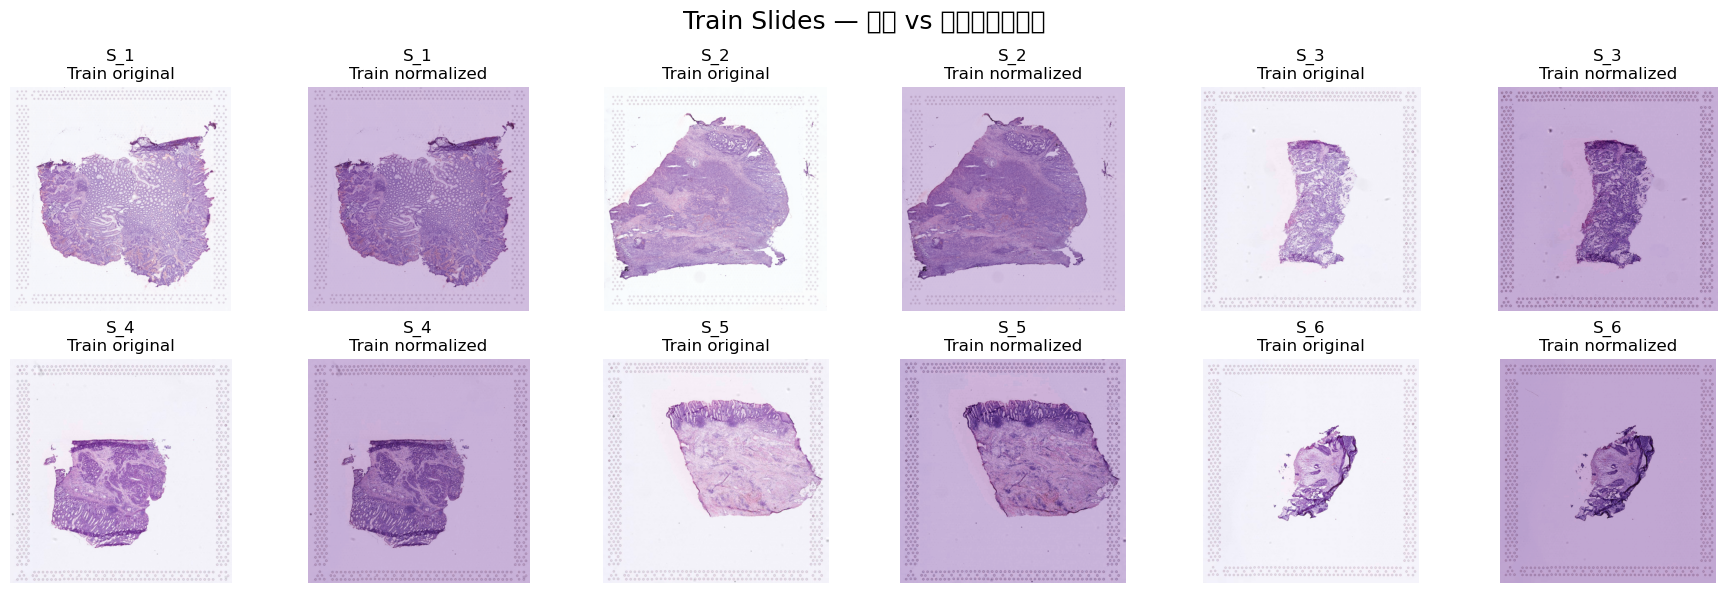

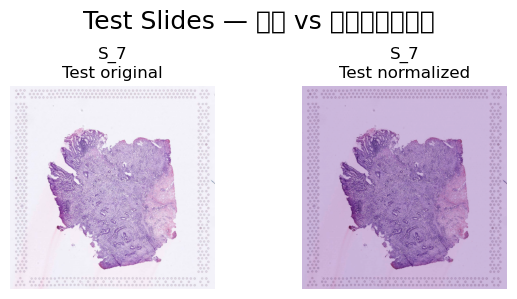

In [14]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2hed, hed2rgb
import math
import random

# -----------------------------------------------------------------------------
# 1) 组织掩码：简单用亮度阈值，纯白背景（几乎 R=G=B=1）被视为背景，其它都算组织
# -----------------------------------------------------------------------------
def make_tissue_mask(img: np.ndarray, thresh: float = 0.8) -> np.ndarray:
    """
    img: float32 HxWx3, 值域 [0,1]
    thresh: 如果像素平均亮度 > thresh，就当做“背景”
    返回: bool HxW, True 表示组织区域
    """
    gray = img.mean(axis=2)   # HxW
    return gray < thresh     # True = tissue

# -----------------------------------------------------------------------------
# 2) 只在组织区域上做 HED 归一化，其它地方保持原图
# -----------------------------------------------------------------------------
def hed_normalize_tissue_only(
    img: np.ndarray,
    means_ref: np.ndarray,
    stds_ref: np.ndarray,
    tissue_mask: np.ndarray
) -> np.ndarray:
    """
    只对 tissue_mask==True 的像素做 HED 归一化；背景仍保留原始 img。
    """
    # 转 HED
    hed = rgb2hed(img)  # HxWx3
    # 对每个通道只在组织区域上算 mean/std
    for c in range(3):
        ch = hed[..., c]
        tissue_vals = ch[tissue_mask]
        m = tissue_vals.mean()
        s = tissue_vals.std() + 1e-8
        # 标准化后再映射到参考
        ch_norm = (ch - m) / s * stds_ref[c] + means_ref[c]
        # 只把组织区域替换成新值，其它地方保持原来 ch
        hed[..., c] = np.where(tissue_mask, ch_norm, ch)
    # 转回 RGB 并裁剪
    out = hed2rgb(hed)
    return np.clip(out, 0, 1).astype(np.float32)

# -----------------------------------------------------------------------------
# 3) 只从 tissue 区域里采样 patch —— 比如要 N_patches 个，每个 size*size
# -----------------------------------------------------------------------------
def sample_tissue_patches(
    img: np.ndarray,
    tissue_mask: np.ndarray,
    patch_size: int = 256,
    n_patches: int = 10,
    min_frac: float = 0.5,
    seed: int = 0
) -> list[tuple[np.ndarray, tuple[int,int]]]:
    """
    随机采 n_patches 个 patch，但只接受那些组织像素比例 >= min_frac 的 patch。
    返回: list of (patch_array, (i,j)) 坐标
    """
    H, W, _ = img.shape
    rng = np.random.RandomState(seed)
    out = []
    tries = 0
    while len(out) < n_patches and tries < n_patches*50:
        i = rng.randint(0, H - patch_size)
        j = rng.randint(0, W - patch_size)
        mask_patch = tissue_mask[i:i+patch_size, j:j+patch_size]
        if mask_patch.mean() >= min_frac:
            patch = (img[i:i+patch_size, j:j+patch_size]*255).astype(np.uint8)
            out.append((patch, (i,j)))
        tries += 1
    return out

# -----------------------------------------------------------------------------
# 4) 主流程：先从 Test/S_7 抽 patch 计算 HED 参考，然后在 Train/Test 上做可视化
# -----------------------------------------------------------------------------
with h5py.File("./dataset/elucidata_ai_challenge_data.h5", "r") as h5:
    test_grp  = h5["images/Test"]
    ref_img   = np.array(test_grp["S_7"])
    ref_mask  = make_tissue_mask(ref_img, 0.8)

# 从 ref_img 上只采组织 patch
patches = sample_tissue_patches(
    ref_img, ref_mask,
    patch_size=256, n_patches=10,
    min_frac=0.7, seed=49
)

# 展示这 10 块 patch
fig, axes = plt.subplots(2,5,figsize=(15,6))
for ax,(p,(i,j)) in zip(axes.flatten(), patches):
    ax.imshow(p); ax.set_title(f"@({i},{j})"); ax.axis("off")
plt.suptitle("🔍 Tissue‐only Patches from Test/S_7",fontsize=16)
plt.tight_layout(); plt.show()

# 拼合所有 patch 再算参考 HED 均值/方差
all_px   = np.vstack([p.reshape(-1,3) for p,_ in patches]).reshape(-1,3)
all_hed  = rgb2hed(all_px.reshape(-1,1,3)).reshape(-1,3)
means_ref = all_hed.mean(axis=0)
stds_ref  = all_hed.std(axis=0)

# -----------------------------------------------------------------------------
# 5) 在 Train/Test 上同时做 “原图 vs 只对组织归一化” 的对比可视化
# -----------------------------------------------------------------------------
with h5py.File("./dataset/elucidata_ai_challenge_data.h5", "r") as h5:
    train_grp = h5["images/Train"]
    test_grp  = h5["images/Test"]

    def plot_compare(grp, slides, title):
        n    = len(slides)
        cols = math.ceil(math.sqrt(n))
        rows = math.ceil(n/cols)
        fig, axes = plt.subplots(rows, cols*2, figsize=(cols*6, rows*3))
        axes = axes.reshape(rows, cols*2)
        for idx, sid in enumerate(slides):
            i = idx // cols; j = idx % cols

            img  = np.array(grp[sid])
            mask = make_tissue_mask(img, 1)
            norm = hed_normalize_tissue_only(img, means_ref, stds_ref, mask)

            ax1 = axes[i, j*2  ]
            ax1.imshow(img)
            ax1.set_title(f"{sid}\n{title} original")
            ax1.axis("off")

            ax2 = axes[i, j*2+1]
            ax2.imshow(norm)
            ax2.set_title(f"{sid}\n{title} normalized")
            ax2.axis("off")

        # 隐藏多余
        for k in range(len(slides), rows*cols):
            r, c = divmod(k, cols)
            axes[r, c*2  ].axis("off")
            axes[r, c*2+1].axis("off")

        plt.suptitle(f"{title} Slides — 原图 vs 只对组织归一化", fontsize=18)
        plt.tight_layout()
        plt.show()

    plot_compare(train_grp, list(train_grp.keys()), "Train")
    plot_compare(test_grp,  list(test_grp.keys()),  "Test")


In [16]:

# -----------------------------------------------------------------------------
# 2) 读取原始 HDF5，处理后写入新文件
# -----------------------------------------------------------------------------
src_path = "./dataset/elucidata_ai_challenge_data.h5"
dst_path = "./dataset/hed_normalize_image.h5"

with h5py.File(src_path, "r") as src, h5py.File(dst_path, "w") as dst:
    # 建立同样的分组结构
    for split in ["Train", "Test"]:
        grp_in  = src[f"images/{split}"]
        grp_out = dst.create_group(f"images/{split}")
        for slide_id in grp_in.keys():
            img = np.array(grp_in[slide_id], dtype=np.float32)  # [0,1]
            mask = make_tissue_mask(img, 1)
            norm = hed_normalize_tissue_only(img, means_ref, stds_ref, mask)
            # 保存
            grp_out.create_dataset(
                name=slide_id,
                data=norm
            )

print(f"✅ 已生成归一化文件: {dst_path}")


✅ 已生成归一化文件: ./dataset/hed_normalize_image.h5


In [1]:
import staintools


ModuleNotFoundError: No module named 'spams'